<h1>Capstone 1</h1>
<h2>Red Wine Quality, UC Irvine</h2> 
<h3>Random Forest Classifier and Support Vector Classifier</h3>
<h3>Two Categories</h3>

(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)<br>

<h4>Audrey Rager</h4>
<h4>November 18, 2020</h4>


## Importing Packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Loading Dataset

In [22]:
df = pd.read_csv('winequality-red.csv',sep=";")
print("Dataset Shape: ", df.shape)

#CHECKING DATA DISTRIBUTION
df.head()

Dataset Shape:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Preprocessing dataset

In [23]:
df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>

In [24]:
# Classifying the wine quality as good or bad based on quality
# "Bad" or 0 if quality lies in the range (3, 6) (inclusivity)
# "Good" or 1 if quality lies in the range (7, 8) (inclusivity)

df['quality'] = df['quality'].apply(lambda x: 1 if x >6.5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

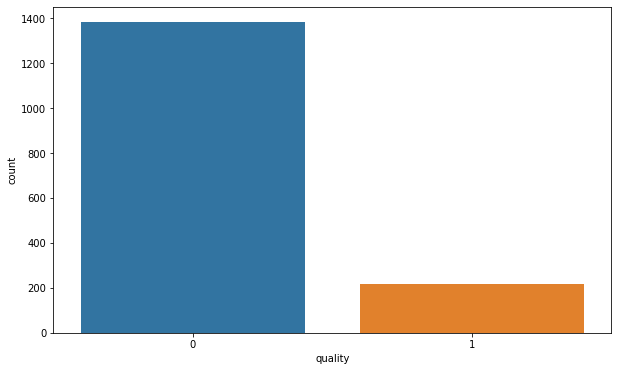

In [25]:
print(df['quality'].value_counts())

fig = plt.figure(figsize = (10,6))
sns.countplot(df['quality'])

In [26]:
# Separating the dependent and independent variables

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [27]:
# Splitting into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("X-train shape: ", X_train.shape)
print("X-test shape: ", X_test.shape)
print("y-train shape: ", y_train.shape)
print("y-test shape: ", y_test.shape)


X-train shape:  (1119, 11)
X-test shape:  (480, 11)
y-train shape:  (1119,)
y-test shape:  (480,)


In [28]:
# applying Standard Scaling to the dataset to scale all the field values to same scale (approx.).

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



## Creating ML Model

### (1) RANDOM FOREST CLASSIFIER

In [29]:
# Creating Random Forest Classifier Instance

rf_regressor = RandomForestClassifier(n_estimators = 100)

# fitting the classifier with training data
rf_regressor.fit(X_train,y_train)

# Predicting using Classifier
y_pred = rf_regressor.predict(X_test)



[[401  12]
 [ 42  25]]


<Figure size 720x432 with 0 Axes>

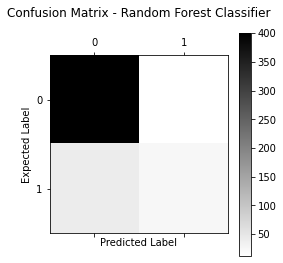

In [30]:
# Confusion matrix using the Random Forest Classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Matplot for confusion matrix of Random Forest Classifier
fig = plt.figure(figsize = (10,6))
plt.matshow(cm,cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confusion Matrix - Random Forest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()



In [31]:
print("Total Predictions : ",len(y_pred))
print("Correct Prediction : ", sum(y_pred == y_test))
print("Incorrect Prediction : ", sum(y_pred != y_test))
print("Accuracy : ", sum(y_pred == y_test)*100 / len(y_pred), "%")



Total Predictions :  480
Correct Prediction :  426
Incorrect Prediction :  54
Accuracy :  88.75 %


### SUPPORT VECTOR CLASSIFIER (SVC)

In [32]:
# Support Vector Classifier Instance
svc_regressor = SVC()
# fitting train data to Support Vector Classifier
svc_regressor.fit(X_train, y_train)

# Predicitng using Support Vector Classifier
y_pred = svc_regressor.predict(X_test)


[[404   9]
 [ 48  19]]


<Figure size 720x432 with 0 Axes>

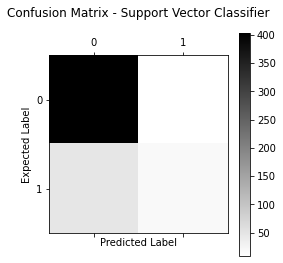

In [33]:
# Confusion Matrix using the Support Vector Classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Matplot for Confusion Matrix of Support Vector Classifier
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confusion Matrix - Support Vector Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()



In [34]:
print("Total Predictions : ",len(y_pred))
print("Correct Prediction : ", sum(y_pred == y_test))
print("Incorrect Prediction : ", sum(y_pred != y_test))
print("Accuracy : ", sum(y_pred == y_test)*100 / len(y_pred), "%")


Total Predictions :  480
Correct Prediction :  423
Incorrect Prediction :  57
Accuracy :  88.125 %


### TUNING ML ALGORITHM
#### (1) SVC

In [35]:
# Finding parameters for SVC models

param = {
    'C':[0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
    'kernel':['linear','rbf'],
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}

grid_svc = GridSearchCV(svc_regressor, param_grid = param, scoring = 'accuracy', cv = 10)



In [36]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [37]:
print("Best Parameters for SVC: ",grid_svc.best_params_)

Best Parameters for SVC:  {'C': 1.4, 'gamma': 0.9, 'kernel': 'rbf'}


Confusion Matrix: 
 [[404   9]
 [ 38  29]]


<Figure size 720x432 with 0 Axes>

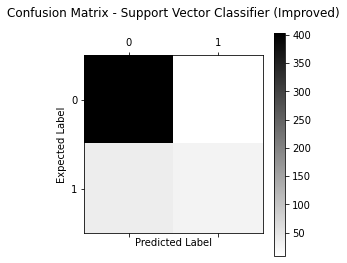

In [38]:
svc_regressor2 = SVC( C = 1.4, gamma = 0.9, kernel = 'rbf')

svc_regressor2.fit(X_train, y_train)

y_pred_svc = svc_regressor2.predict(X_test)

cm_svc2 = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix: \n", cm_svc2)

fig = plt.figure(figsize = (10,6))
plt.matshow(cm_svc2, cmap = plt.cm.binary, interpolation = "nearest")
plt.title("Confusion Matrix - Support Vector Classifier (Improved)\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()



In [39]:
print("Total Predictions : ",len(y_pred_svc))
print("Correct Prediction : ", sum(y_pred_svc == y_test))
print("Incorrect Prediction : ", sum(y_pred_svc != y_test))
print("Accuracy : ", sum(y_pred_svc == y_test)*100 / len(y_pred_svc), "%")


Total Predictions :  480
Correct Prediction :  433
Incorrect Prediction :  47
Accuracy :  90.20833333333333 %


#### (2) RANDOM FOREST CLASSIFIER

In [40]:
rf_eval = cross_val_score(estimator = rf_regressor, X = X_train, y = y_train, cv = 10)
rf_eval.mean()

0.9160231660231659